In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold,cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression
from numpy import mean,absolute
from sklearn.metrics import mean_absolute_error
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [25]:
df = pd.read_csv('fetal_health.csv')
df
df.iloc[:,21].shape

(2126,)

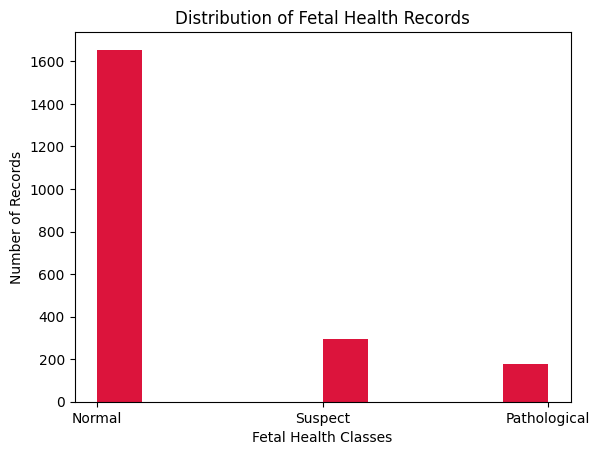

In [26]:
fetal_health = df['fetal_health']
plt.hist(fetal_health,color='crimson')

plt.xticks([1,2,3],['Normal','Suspect','Pathological'])

plt.xlabel('Fetal Health Classes')
plt.ylabel('Number of Records')
plt.title("Distribution of Fetal Health Records")
plt.show()

In [27]:
X = df.iloc[:,:-1]
Y = fetal_health

x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y)

model=LinearRegression()
model.fit(x_train, y_train)

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
error = mean(absolute(scores))

print(f'Mean Absolute Error: {error:.3f}')
print("Range of Data: ", (df.max() - df.min()).iloc[0])
print("Variance: ", df.var().iloc[0])


Mean Absolute Error: 0.277
Range of Data:  54.0
Variance:  96.84221570472027


To address the data imbalance in this dataset using stratification, we used the StratifiedKFold class from the sklearn.model_selection module. This class can be used to split a dataset into folds while maintaining the same class balance in each fold. This can help ensure that each fold is representative of the overall dataset, which can improve the accuracy and reliability of your model. 

The values in the dataset have a large range and high variance, so it may be more difficult for a model to make accurate predictions and a lower MAE showcases that the model is quite accurate. We got a low MAE of 0.277 which shows that our stratified k fold cross validation approach was succesful.

In [75]:
model = LogisticRegression(max_iter=10000)

rfe = RFE(model,n_features_to_select=10)
fit = rfe.fit(X,Y)

selected_features = X.columns[fit.support_]
sorted_ranking = sorted(fit.ranking_, reverse=True)
ranked_features = zip(sorted_ranking, selected_features)

# Print the top 10 ranked features
print("Top 10 Ranked Features:")
for ranking, feature in ranked_features[:10]:
  print(f"{feature}: {ranking}")


Selected Features: Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations',
       'mean_value_of_short_term_variability', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mean', 'histogram_median'],
      dtype='object')
Feature Ranking: [ 1  1  1  1  1 12  6  2  1  5  4 11  9  8  1  1 10  1  1  7  3]
